## Загрузка датасета

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
%cd /content/drive/My Drive/Colab Notebooks/Diplom2024/Code/dataset

/content/drive/My Drive/Colab Notebooks/Diplom2024/Code/dataset


In [74]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import pandas as pd


In [75]:
dataset = pd.read_csv("syscalls_dataset_2.csv")

In [76]:
dataset

,last syscalls,syscall
0,"openatsyscall(AT_FDCWD, ""/dev/urandom"", O_RDON...",geteuidsyscall()syscall0
1,"readsyscall(6, ""/* SPDX-License-Identifier: GP...","newfstatatsyscall(6, """", {st_mode=S_IFREG|0644..."
2,"newfstatatsyscall(3, """", {st_mode=S_IFREG|0644...","readsyscall(3, ""/* SPDX-License-Identifier: GP..."
3,"mprotectsyscall(0x7f303ebe9000, 4096, PROT_REA...","rt_sigactionsyscall(SIGFPE, {sa_handler=SIG_IG..."
4,"fchownatsyscall(AT_FDCWD, ""debian/linux-header...","newfstatatsyscall(AT_FDCWD, ""debian/linux-head..."
...,...,...
499995,"newfstatatsyscall(3, """", {st_mode=S_IFREG|0644...","readsyscall(3, ""/* SPDX-License-Identifier: GP..."
499996,"newfstatatsyscall(5, """", {st_mode=S_IFDIR|0755...","readsyscall(5, ""# SPDX-License-Identifier: GPL..."
499997,"fsetxattrsyscall(4, ""system.posix_acl_access"",...","newfstatatsyscall(3, """", {st_mode=S_IFREG|0644..."
499998,"mmapsyscall(NULL, 12288, PROT_READ|PROT_WRITE,...","mprotectsyscall(0x7f12f1f8f000, 16384, PROT_RE..."


In [77]:
# dataset = pd.read_csv("syscalls_dataset.csv", delimiter=";")
dataset2 = pd.DataFrame({'syscall': [dataset.iloc[0][0]], 'last syscalls': [dataset.iloc[0][0]]})

for i in range(len(dataset)):
    print(i)
    if dataset.iloc[i]['syscall'] not in dataset2['syscall'].tolist() and dataset.iloc[i]['last syscalls'] not in dataset2['last syscalls'].tolist():
        dataset2.loc[len(dataset2.index)] = [dataset.iloc[i][0], dataset.iloc[i][0]]


Выходные данные были обрезаны до нескольких последних строк (5000).
245445
245446
245447
245448
245449
245450
245451
245452
245453
245454
245455
245456
245457
245458
245459
245460
245461
245462
245463
245464
245465
245466
245467
245468
245469
245470
245471
245472
245473
245474
245475
245476
245477
245478
245479
245480
245481
245482
245483
245484
245485
245486
245487
245488
245489
245490
245491
245492
245493
245494
245495
245496
245497
245498
245499
245500
245501
245502
245503
245504
245505
245506
245507
245508
245509
245510
245511
245512
245513
245514
245515
245516
245517
245518
245519
245520
245521
245522
245523
245524
245525
245526
245527
245528
245529
245530
245531
245532
245533
245534
245535
245536
245537
245538
245539
245540
245541
245542
245543
245544
245545
245546
245547
245548
245549
245550
245551
245552
245553
245554
245555
245556
245557
245558
245559
245560
245561
245562
245563
245564
245565
245566
245567
245568
245569
245570
245571
245572
245573
245574
245575
245576
245577
2

KeyboardInterrupt: 

In [78]:
dataset2

,syscall,last syscalls
0,"openatsyscall(AT_FDCWD, ""/dev/urandom"", O_RDON...","openatsyscall(AT_FDCWD, ""/dev/urandom"", O_RDON..."
1,"readsyscall(6, ""/* SPDX-License-Identifier: GP...","readsyscall(6, ""/* SPDX-License-Identifier: GP..."
2,"newfstatatsyscall(3, """", {st_mode=S_IFREG|0644...","newfstatatsyscall(3, """", {st_mode=S_IFREG|0644..."
3,"mprotectsyscall(0x7f303ebe9000, 4096, PROT_REA...","mprotectsyscall(0x7f303ebe9000, 4096, PROT_REA..."
4,"fchownatsyscall(AT_FDCWD, ""debian/linux-header...","fchownatsyscall(AT_FDCWD, ""debian/linux-header..."
...,...,...
159803,"rt_sigprocmasksyscall(SIG_UNBLOCK, [HUP INT QU...","rt_sigprocmasksyscall(SIG_UNBLOCK, [HUP INT QU..."
159804,"mprotectsyscall(0x7fd3f6825000, 16384, PROT_RE...","mprotectsyscall(0x7fd3f6825000, 16384, PROT_RE..."
159805,"writesyscall(1, ""\nstatic inline __attribute__...","writesyscall(1, ""\nstatic inline __attribute__..."
159806,"newfstatatsyscall(5, """", {st_mode=S_IFDIR|0755...","newfstatatsyscall(5, """", {st_mode=S_IFDIR|0755..."


In [79]:
dataset = dataset2

In [80]:
from sklearn.utils import shuffle

dataset = shuffle(dataset)

In [81]:
dataset

,syscall,last syscalls
142095,"writesyscall(3, "".uleb128 .LVU2442\n\t.uleb128...","writesyscall(3, "".uleb128 .LVU2442\n\t.uleb128..."
42167,"openatsyscall(AT_FDCWD, ""./arch/x86/include/li...","openatsyscall(AT_FDCWD, ""./arch/x86/include/li..."
45092,"pread64syscall(3, ""\4\0\0\0\24\0\0\0\3\0\0\0GN...","pread64syscall(3, ""\4\0\0\0\24\0\0\0\3\0\0\0GN..."
105208,"newfstatatsyscall(3, """", {st_mode=S_IFREG|0644...","newfstatatsyscall(3, """", {st_mode=S_IFREG|0644..."
111261,closesyscall(13)syscall0last_n_syscallsopenats...,closesyscall(13)syscall0last_n_syscallsopenats...
...,...,...
20326,closesyscall(3)syscall0last_n_syscallsclosesys...,closesyscall(3)syscall0last_n_syscallsclosesys...
74697,"readsyscall(12, ""/* SPDX-License-Identifier: G...","readsyscall(12, ""/* SPDX-License-Identifier: G..."
154984,"newfstatatsyscall(5, """", {st_mode=S_IFDIR|0755...","newfstatatsyscall(5, """", {st_mode=S_IFDIR|0755..."
152491,"readsyscall(7, ""/* SPDX-License-Identifier: GP...","readsyscall(7, ""/* SPDX-License-Identifier: GP..."


## Выбор девайса

In [82]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cuda device


In [83]:
from collections import Counter, defaultdict

import numpy as np
import pandas as pd
import torch
from torch.nn import Embedding, Linear, LSTM, Module
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, SubsetRandomSampler
from tqdm import tqdm
import re

## Разбиение данных на токены

In [84]:
import re

def tokenizer(syscalls):
    syscalls = syscalls.split(sep='last_n_syscalls')
    tokens = []
    for syscall in syscalls:
        str = syscall.split(sep='syscall')
        str = [s if len(s) > 0 else '<pad>' for s in str]
        tokens.extend(['syscallname',str[0], 'syscallargs', str[1], 'syscallres', str[2], 'syscallend'])

    return tokens

## Преобразование токены в коды

In [85]:
from collections import Counter

In [86]:
def token_to_sequence(tokens, token2index):
    seq = []
    for token in tokens:
        index = token2index.get(token, len(token2index) - 1) # len(token2index) - 1 означает неизвестное слово
        seq.append(index)

    return seq

## Класс данных системных вызовов для обучения

In [87]:
class SyscallDataset(Dataset):
    def __init__(self, dataset, token_size):
        self.dataset = dataset

        # Разбиваем системные вызовы на токены
        self.last_syscalls_tokens = [tokenizer(self.dataset.iloc[i]['last syscalls']) for i in range(len(self.dataset))]
        self.syscall_tokens = [tokenizer(self.dataset.iloc[i]['syscall']) for i in range(len(self.dataset))]

        # Все токены встретившихся системных вызовов
        syscalls_names = [last_syscall[j+1] for last_syscall in self.last_syscalls_tokens
                              for j in [*range(len(last_syscall))][::len(self.syscall_tokens[0])]]

        syscalls_names.extend([syscall[1] for syscall in self.syscall_tokens])


        # Индексируем встречающиеся названия системных вызовов по их встречаемости
        tokens_counter = Counter(syscalls_names)

        most_common_token2index = {
            token[0]: i
            for i, token in enumerate(tokens_counter.most_common())
        }

        # Все названия встретившихся системных вызовов
        self.syscalls_name = list(most_common_token2index.keys())

        # Добавление оставшихся токенов для индексации
        tokens_counter = Counter()

        for syscalls_token in self.last_syscalls_tokens:
            for token in syscalls_token:
                if token not in self.syscalls_name:
                    tokens_counter.update({token: 1})

        most_common_token2index.update({
            token[0]: i + len(self.syscalls_name)
            for i, token in enumerate(tokens_counter.most_common()[:(token_size - 2 - len(self.syscalls_name))])
        })


        # Словарь, отображающий токены в коды
        self.token2index = dict()
        # Словарь, отображающий коды в токены
        self.index2token = dict()


        self.token2index.update(most_common_token2index)
        self.token2index.update({"<pad>": len(self.token2index), "<unk>": len(self.token2index) + 1})

        self.index2token = {v: k for k, v in self.token2index.items()}

        self.token_size = min(len(self.index2token), token_size)

        self.vocabulary = [self.index2token[i] for i in range(len(self.syscalls_name))]


    def __len__(self):
        return len(self.dataset)

    def __getitem__(self, ix):
        X = torch.LongTensor(
            token_to_sequence(self.last_syscalls_tokens[ix], self.token2index)
        )

        y = token_to_sequence(self.syscall_tokens[ix], self.token2index)

        return X, y[1]


## Класс нейронной сети системных вызовов

In [88]:
class SyscallNetwork(Module):
    def __init__(
        self,
        token_size,
        syscalls_name_len,
        embedding_dim=2,
        hidden_dim_1=8,
        hidden_dim_2=32,
        max_norm=2,
        n_layers=1,
    ):
        super().__init__()

        self.embedding = Embedding(
                token_size,
                embedding_dim,
                padding_idx=0,
                norm_type=2,
                max_norm=max_norm,
        )
        self.lstm = LSTM(
                embedding_dim, hidden_dim_1, batch_first=True, num_layers=n_layers
        )
        self.linear_1 = Linear(hidden_dim_1, hidden_dim_2)
        self.linear_2 = Linear(hidden_dim_2, syscalls_name_len)
        self.sm = torch.nn.Softmax(dim=1)


    def forward(self, x, h=None, c=None):
        emb = self.embedding(x)  # (n_samples, window_size, embedding_dim)

        if h is not None and c is not None:
            _, (h, c) = self.lstm(emb, (h, c))
        else:
            _, (h, c) = self.lstm(emb)  # (n_layers, n_samples, hidden_dim)

        h_mean = h.mean(dim=0)  # (n_samples, hidden_dim)
        x = self.linear_1(h_mean)  # (n_samples, dense_dim)
        logits = self.linear_2(x)  # (n_samples, syscalls_name_len)

        return logits, h, c

def compute_loss_and_accuracy(loss, net, dataloader):
    net.eval()
    all_losses = []
    all_accuracy = []

    for X_batch, y_batch in dataloader:
        # print('X_batch shape = {X_batch.shape}')
        pred, _, _ = net(X_batch)

        # print()
        # print(80*'-')
        # print('pred ', pred)
        # print(80*'-')
        # print('y_batch ', y_batch)
        # print(80*'-')

        all_losses.append(loss(pred, y_batch).item())

        pred = pred.argmax(dim=1)

        # print()
        # print(80*'-')
        # print('pred ', pred)
        # print(80*'-')
        # print('y_batch ', y_batch)
        # print(80*'-')
        # print((pred == y_batch).float())
        # print(f'y_batch shape = {y_batch.shape} \t pred num shape = {pred.shape} \t X_batch shape = {X_batch.shape}')
        # print('*', 80*'-')

        all_accuracy.append((pred == y_batch).float().mean())

    # print(80*'*')
    # print('all_losses:')
    # print(len(all_losses))
    # print(all_losses)
    # print('all_accuracy:')
    # print(len(all_accuracy))
    # print(all_accuracy)
    # print(80*'*')

    return np.mean(all_losses), np.mean(all_accuracy)


#### Задание гиперпараметров

In [89]:
token_size = 15000 # максимальное количество токенов
embedding_dim = 2
hidden_dim_1 = 32
hidden_dim_2 = 64
n_layers = 1 # кол-во повторяющихся слоев в LSTM
max_norm = 2

n_epochs = 10
train_split = 0.7
val_split = 0.1
batch_size = 128

#### Функция потерь

In [90]:
loss_f = torch.nn.CrossEntropyLoss()

## Создание тренировочного и валидационного датасета

In [91]:
syscalldataset = SyscallDataset(dataset, token_size)


n_samples = len(dataset)
train_ix = int(n_samples * train_split)
val_ix = int(n_samples * val_split) + train_ix

train_indices, val_indices, test_indices = np.arange(train_ix), np.arange(train_ix, val_ix), np.arange(val_ix, n_samples)

train_dataloader = DataLoader(
        syscalldataset, sampler=SubsetRandomSampler(train_indices),
        batch_size=batch_size
)
val_dataloader = DataLoader(
        syscalldataset, sampler=SubsetRandomSampler(val_indices),
        batch_size=batch_size
)
test_dataloader = DataLoader(
        syscalldataset, sampler=SubsetRandomSampler(test_indices),
        batch_size=batch_size
)

## Создание нейронной сети и оптимайзера


In [92]:
net = SyscallNetwork(
        syscalldataset.token_size,
        len(syscalldataset.syscalls_name),
        hidden_dim_1=hidden_dim_1,
        n_layers=n_layers,
        hidden_dim_2=hidden_dim_2,
        embedding_dim=embedding_dim,
        max_norm=max_norm,
)

optimizer = torch.optim.Adam(
        net.parameters(),
        lr=1e-2,
)


## Обучение нейронной сети и сохранение лучшей модели

In [93]:
emb_history = []
val_accuracy_history = []
val_loss_history = []
train_loss_history = []
best_val_acc = 0.0

for epoch in range(n_epochs):
    net.train()
    for X_batch, y_batch in tqdm(train_dataloader):
        optimizer.zero_grad()
        pred, _, _ = net(X_batch)
        loss = loss_f(pred, y_batch)
        loss.backward()

        optimizer.step()


    if epoch % 1 == 0 or epoch == n_epochs:
        train_loss, _ = compute_loss_and_accuracy(loss_f, net, train_dataloader)
        val_loss, val_acc = compute_loss_and_accuracy(loss_f, net, val_dataloader)
        print(f"Epoch: {epoch}, train loss: {train_loss=:.3f}, validation loss {val_loss=:.3f}")
        print(f'Accuracy: {val_acc}')
        train_loss_history.append(train_loss)
        val_loss_history.append(val_loss)
        val_accuracy_history.append(val_acc)

        if (val_acc > best_val_acc):
            best_val_acc = val_acc
            torch.save(net.state_dict(), 'best-model-syscall-prediction.pt')


    # Prepare DataFrame

    weights = net.embedding.weight.detach().clone().numpy()[:len(syscalldataset.vocabulary)]

    df = pd.DataFrame(weights, columns=[f"dim_{i}" for i in range(embedding_dim)])
    df["epoch"] = epoch
    df["token"] = syscalldataset.vocabulary


    emb_history.append(df)

final_df = pd.concat(emb_history)
final_df.to_csv("res.csv", index=False)

100%|██████████| 874/874 [00:12<00:00, 69.94it/s]


Epoch: 0, train loss: train_loss=0.098, validation loss val_loss=0.107
Accuracy: 0.9746018648147583


100%|██████████| 874/874 [00:12<00:00, 68.28it/s]


Epoch: 1, train loss: train_loss=0.017, validation loss val_loss=0.024
Accuracy: 0.9961875081062317


100%|██████████| 874/874 [00:13<00:00, 66.90it/s]


Epoch: 2, train loss: train_loss=0.019, validation loss val_loss=0.023
Accuracy: 0.9965000152587891


100%|██████████| 874/874 [00:13<00:00, 66.65it/s]


Epoch: 3, train loss: train_loss=4.193, validation loss val_loss=4.252
Accuracy: 0.5886828899383545


100%|██████████| 874/874 [00:13<00:00, 66.92it/s]


Epoch: 4, train loss: train_loss=0.004, validation loss val_loss=0.009
Accuracy: 0.9987499713897705


100%|██████████| 874/874 [00:12<00:00, 69.28it/s]


Epoch: 5, train loss: train_loss=0.006, validation loss val_loss=0.012
Accuracy: 0.9977384209632874


100%|██████████| 874/874 [00:14<00:00, 61.50it/s]


Epoch: 6, train loss: train_loss=0.005, validation loss val_loss=0.012
Accuracy: 0.9983124732971191


100%|██████████| 874/874 [00:13<00:00, 66.50it/s]


Epoch: 7, train loss: train_loss=0.017, validation loss val_loss=0.025
Accuracy: 0.9921134114265442


100%|██████████| 874/874 [00:13<00:00, 66.34it/s]


Epoch: 8, train loss: train_loss=0.010, validation loss val_loss=0.018
Accuracy: 0.9972500205039978


100%|██████████| 874/874 [00:13<00:00, 65.40it/s]


Epoch: 9, train loss: train_loss=0.004, validation loss val_loss=0.013
Accuracy: 0.9977499842643738


## Графики loss и accuracy

In [94]:
import matplotlib.pyplot as plt

### Train

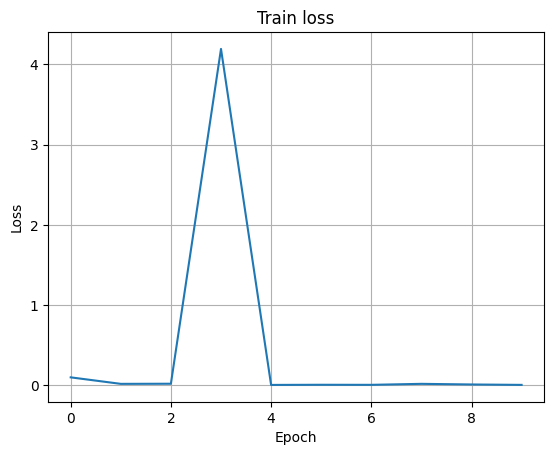

In [95]:
plt.title("Train loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.plot(train_loss_history)

### Validation

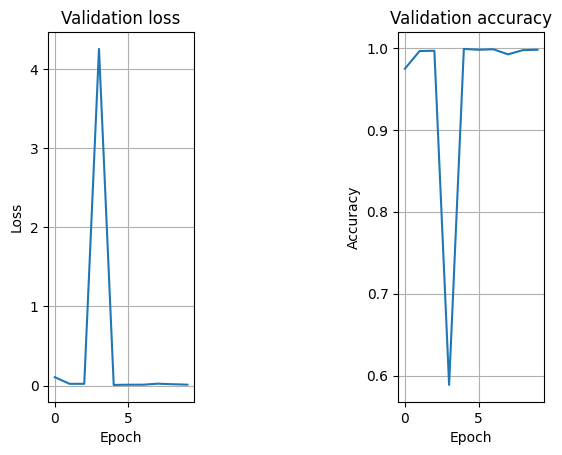

In [96]:
plt.subplot(1, 3, 1)
plt.title("Validation loss")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.plot(val_loss_history)


plt.subplot(1, 3, 3)
plt.title("Validation accuracy")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.plot(val_accuracy_history)


### График embeddings

In [97]:
import plotly
import plotly.graph_objects as go
import plotly.express as px

In [98]:
df = pd.read_csv("res.csv")

In [99]:
px.scatter(
    df,
    x='dim_0', y='dim_1',
    text = 'token',
    animation_frame='epoch',
    animation_group='token',
    # size='pop',
    # color='continent',
    hover_name='token'
    # log_x=True,
    # size_max=55,
    # range_x=[100, 100000], range_y=[25, 90]
)

### Загрузка лучшей модели

In [100]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/My Drive/Colab Notebooks/Diplom2024/Code/dataset

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Diplom2024/Code/dataset


In [101]:
import torch

best_model = SyscallNetwork(
        syscalldataset.token_size,
        len(syscalldataset.syscalls_name),
        hidden_dim_1=hidden_dim_1,
        n_layers=n_layers,
        hidden_dim_2=hidden_dim_2,
        embedding_dim=embedding_dim,
        max_norm=max_norm,
)

best_model.load_state_dict(torch.load('best-model-syscall-prediction.pt'))
best_model.eval()

SyscallNetwork(
  (embedding): Embedding(15000, 2, padding_idx=0, max_norm=2)
  (lstm): LSTM(2, 32, batch_first=True)
  (linear_1): Linear(in_features=32, out_features=64, bias=True)
  (linear_2): Linear(in_features=64, out_features=92, bias=True)
  (sm): Softmax(dim=1)
)

In [102]:
test_loss, test_accuracy = compute_loss_and_accuracy(loss_f, best_model, test_dataloader)

In [103]:
print(f'Test loss: {test_loss}')
print(f'Test accuracy: {test_accuracy}')

Test loss: 0.006610430433531292
Test accuracy: 0.9989687204360962
